## P1-permutation-invariant functions



### P1.1 Implement the neural network

In [1]:
#P1.1 Implement the neural network 
# import all the setups
# data preprocessing modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# ML modules
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Lambda, Activation, BatchNormalization, Concatenate
# early stopping, callback, all the steps you are running you can ask the model to stop...
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD

# general stuff
import pandas as pd
import io
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import the data
df1 = pd.read_csv('/content/train-1.csv', na_values=['NA','?'])
df2 = pd.read_csv('/content/test-1.csv', na_values=['NA','?'])
df1.head()
#df2.head()

,4.431320074018723076e-01,5.324051314609411500e-01,4.377698250476299568e-01,6.196628821722993674e-02,7.836767313308944383e-01,9.357891820280233031e-01,9.091042324650751016e-01,6.836156825808235027e-01,8.954095712546213948e-01,8.711219633267553997e-01,7.336462069558589150e-01
0,0.270151,0.563418,0.136042,0.164526,0.013159,0.731077,0.961079,0.202600,0.921334,0.731678,0.416784
1,0.571161,0.124119,0.826382,0.692914,0.817431,0.573339,0.248638,0.632073,0.606688,0.348984,0.590013
2,0.414595,0.541134,0.383968,0.696607,0.113355,0.591044,0.770690,0.016159,0.291561,0.666265,0.477864
3,0.069221,0.047482,0.269938,0.812681,0.533125,0.091919,0.581794,0.854649,0.298028,0.819031,0.415577
4,0.685363,0.227652,0.694577,0.806527,0.368828,0.295510,0.633057,0.680897,0.293867,0.463691,0.548374


In [3]:
# data pre-processing
X_train, y_train =df1.values[:, :-1], df1.values[:,-1]
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test, y_test=df2.values[:,:-1], df2.values[:,-1]
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(99999, 10) (99999,) (9999, 10) (9999,)


In [4]:
#dataframe into dataset
df1.values

array([[2.70150983e-01, 5.63417802e-01, 1.36042037e-01, ...,
        9.21333864e-01, 7.31677663e-01, 4.16784392e-01],
       [5.71160783e-01, 1.24119348e-01, 8.26382120e-01, ...,
        6.06687932e-01, 3.48983787e-01, 5.90013251e-01],
       [4.14594852e-01, 5.41134012e-01, 3.83967811e-01, ...,
        2.91560663e-01, 6.66265219e-01, 4.77864432e-01],
       ...,
       [8.05508169e-01, 9.60400877e-02, 8.47611912e-02, ...,
        3.37963557e-05, 7.61717979e-01, 6.54114232e-01],
       [7.30580235e-01, 4.99809824e-01, 6.66627622e-01, ...,
        2.48506610e-01, 2.94085649e-01, 5.58009757e-01],
       [4.58422766e-01, 3.85119978e-01, 4.89044667e-01, ...,
        2.90311216e-01, 1.07715687e-01, 4.51459151e-01]])

In [5]:
#dataframe into dataset
df2.values

array([[0.16594335, 0.44725953, 0.72739992, ..., 0.9717372 , 0.99281504,
        0.54315887],
       [0.55572428, 0.81401591, 0.14254006, ..., 0.74194616, 0.48272871,
        0.52908306],
       [0.15756796, 0.98966006, 0.10968536, ..., 0.17456261, 0.8089604 ,
        0.74888564],
       ...,
       [0.69131919, 0.19276581, 0.81484175, ..., 0.20484244, 0.88124685,
        0.81736086],
       [0.10588788, 0.53892315, 0.24139452, ..., 0.60686661, 0.94026094,
        0.44583685],
       [0.06029708, 0.67284363, 0.26760506, ..., 0.75767493, 0.90645153,
        0.6120033 ]])

In [6]:
# determine the number of input features
n_features = X_train.shape[1]
n_features

10

In [10]:
#set the optimizer with the learning rate of 1e-4
optimizer1 =SGD(learning_rate=1e-4)
#compile the first model with loss MSE and metrics ACC
combined_model.compile(loss='MSE',optimizer=optimizer1,  metrics=['acc'])
#train the model of validation split 0.1 and batch size of 128
history = combined_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=2, validation_split=0.1)


Epoch 1/10
704/704 - 3s - loss: 0.1916 - acc: 0.0000e+00 - val_loss: 0.1512 - val_acc: 0.0000e+00 - 3s/epoch - 4ms/step
Epoch 2/10
704/704 - 2s - loss: 0.1237 - acc: 0.0000e+00 - val_loss: 0.0982 - val_acc: 0.0000e+00 - 2s/epoch - 3ms/step
Epoch 3/10
704/704 - 2s - loss: 0.0813 - acc: 0.0000e+00 - val_loss: 0.0654 - val_acc: 0.0000e+00 - 2s/epoch - 3ms/step
Epoch 4/10
704/704 - 1s - loss: 0.0552 - acc: 0.0000e+00 - val_loss: 0.0455 - val_acc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 5/10
704/704 - 2s - loss: 0.0395 - acc: 0.0000e+00 - val_loss: 0.0336 - val_acc: 0.0000e+00 - 2s/epoch - 2ms/step
Epoch 6/10
704/704 - 2s - loss: 0.0302 - acc: 0.0000e+00 - val_loss: 0.0266 - val_acc: 0.0000e+00 - 2s/epoch - 2ms/step
Epoch 7/10
704/704 - 1s - loss: 0.0247 - acc: 0.0000e+00 - val_loss: 0.0225 - val_acc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 8/10
704/704 - 1s - loss: 0.0215 - acc: 0.0000e+00 - val_loss: 0.0202 - val_acc: 0.0000e+00 - 1s/epoch - 2ms/step
Epoch 9/10
704/704 - 2s - loss: 0.0196 -

### P1.2 training the model with lat_dim=5 and 100

Model: "function1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               1100      
                                                                 
 dense_12 (Dense)            (None, 5)                 505       
                                                                 
Total params: 1,605
Trainable params: 1,605
Non-trainable params: 0
_________________________________________________________________
Model: "function2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 1)                 0         
                                                                 
 dense_13 (Dense)            (None, 100)               200       
                                                                 
 dense_14 (Dense)            (None, 

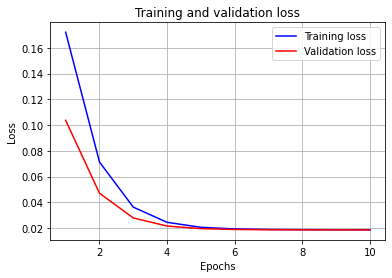

313/313 [==============================] - 1s 2ms/step
Final score (RMSE)for lat_latdim=5: 0.13731986284255981


In [11]:
# P1.2 train the model with lat_dim = 5 for 10 epochs

#build the first function
# define lat_dim
lat_dim = 5

model_1 = Sequential(name='function1')
model_1.add(Dense(100, activation='relu', input_shape=(n_features,)))
model_1.add(Dense(lat_dim, activation='softmax'))

#function2
model_2 = Sequential(name='function2')
model_2.add(Lambda(lambda x: tf.reduce_sum(x, axis=1, keepdims=True), input_shape=(lat_dim,)))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(1))


# Combined model
combined_input = Input(shape=model_1.input_shape[1:])

model_1out = model_1(combined_input)
model_2out = model_2(model_1out)

combined_output = Concatenate()([model_1out, model_2out])
combined_output = Dense(1)(combined_output)
combined_model = keras.Model(inputs=combined_input, outputs=combined_output)

combined_model.summary()

optimizer1 =SGD(learning_rate=1e-4)
combined_model.compile(loss='MSE',optimizer=optimizer1,  metrics=['acc'])
history = combined_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=2, validation_split=0.1)

#Show the training and validation loss versus the number of epochs. 
# Getting necessary data for plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting training and validation loss
# "b" is for "solid blue line"
plt.plot(epochs, loss, 'b', label='Training loss')
# r is for "solid red line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.xscale(value='log')
#plt.yscale(value='log')
plt.grid()
plt.show()

#Show also the test MSE value. 
# Model evaluation
loss = combined_model.evaluate(X_test, y_test)
# RMSE error. 
pred = combined_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print(f"Final score (RMSE)for lat_latdim=5: {score}")



Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 function1 (Sequential)         (None, 100)          11200       ['input_4[0][0]']                
                                                                                                  
 function2 (Sequential)         (None, 1)            301         ['function1[0][0]']              
                                                                                                  
 concatenate_3 (Concatenate)    (None, 101)          0           ['function1[0][0]',              
                                                                  'function2[0][0]']        

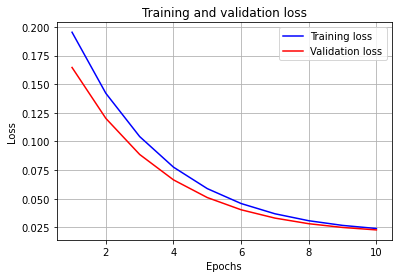

313/313 [==============================] - 1s 2ms/step
Final score (RMSE)for lat_latdim=100: 0.1523183435201645


In [12]:
#Repeat this but by taking lat_dim = 100. Discuss the obtained results.
lat_dim = 100
model_1 = Sequential(name='function1')
model_1.add(Dense(100, activation='relu', input_shape=(n_features,)))
model_1.add(Dense(lat_dim, activation='softmax'))

#function2
model_2 = Sequential(name='function2')
model_2.add(Lambda(lambda x: tf.reduce_sum(x, axis=1, keepdims=True), input_shape=(lat_dim,)))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(1))


# Combined model
combined_input = Input(shape=model_1.input_shape[1:])

model_1out = model_1(combined_input)
model_2out = model_2(model_1out)

combined_output = Concatenate()([model_1out, model_2out])
combined_output = Dense(1)(combined_output)
combined_model = keras.Model(inputs=combined_input, outputs=combined_output)

combined_model.summary()

optimizer1 =SGD(learning_rate=1e-4)
combined_model.compile(loss='MSE',optimizer=optimizer1,  metrics=['acc'])
history = combined_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=2, validation_split=0.1)

#Show the training and validation loss versus the number of epochs. 
# Getting necessary data for plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting training and validation loss
# "b" is for "solid blue line"
plt.plot(epochs, loss, 'b', label='Training loss')
# r is for "solid red line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.xscale(value='log')
#plt.yscale(value='log')
plt.grid()
plt.show()

#Show also the test MSE value. 
# Model evaluation
loss = combined_model.evaluate(X_test, y_test)
# RMSE error. 
pred = combined_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print(f"Final score (RMSE)for lat_latdim=100: {score}")

Comment on using different lat_dim:

For _lat_dim_ 100, the training loss and validation loss are convergent after 3 epochs while _lat_dim_ 5 convergences after 9 epochs.

In terms of the MSE, _lat_dim_ 5 has less loss than _lat_dim_ 100

### P1.3 Train the neural network with lat_dim = 100 with different learning rate of 0.01, 0.1 and 0.5

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 function1 (Sequential)         (None, 100)          11200       ['input_5[0][0]']                
                                                                                                  
 function2 (Sequential)         (None, 1)            301         ['function1[0][0]']              
                                                                                                  
 concatenate_4 (Concatenate)    (None, 101)          0           ['function1[0][0]',              
                                                                  'function2[0][0]']        

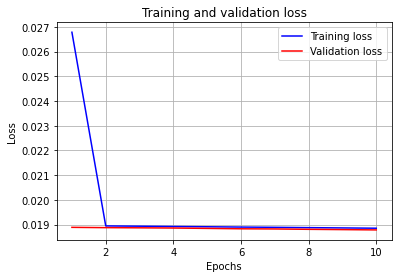

313/313 [==============================] - 1s 2ms/step
Final score (RMSE)for lat_latdim=5: 0.13787081837654114


In [13]:
#lat_dim=100 with learing rate of 0.01
lat_dim = 100
model_1 = Sequential(name='function1')
model_1.add(Dense(100, activation='relu', input_shape=(n_features,)))
model_1.add(Dense(lat_dim, activation='softmax'))

#function2
model_2 = Sequential(name='function2')
model_2.add(Lambda(lambda x: tf.reduce_sum(x, axis=1, keepdims=True), input_shape=(lat_dim,)))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(1))


# Combined model
combined_input = Input(shape=model_1.input_shape[1:])

model_1out = model_1(combined_input)
model_2out = model_2(model_1out)

combined_output = Concatenate()([model_1out, model_2out])
combined_output = Dense(1)(combined_output)
combined_model = keras.Model(inputs=combined_input, outputs=combined_output)

combined_model.summary()

optimizer1 =SGD(learning_rate=0.01)
combined_model.compile(loss='MSE',optimizer=optimizer1,  metrics=['acc'])
history = combined_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=2, validation_split=0.1)

#Show the training and validation loss versus the number of epochs. 
# Getting necessary data for plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting training and validation loss
# "b" is for "solid blue line"
plt.plot(epochs, loss, 'b', label='Training loss')
# r is for "solid red line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.xscale(value='log')
#plt.yscale(value='log')
plt.grid()
plt.show()

#Show also the test MSE value. 
# Model evaluation
loss = combined_model.evaluate(X_test, y_test)
# RMSE error. 
pred = combined_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print(f"Final score (RMSE)for lat_latdim=5: {score}")



Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 function1 (Sequential)         (None, 100)          11200       ['input_7[0][0]']                
                                                                                                  
 function2 (Sequential)         (None, 1)            301         ['function1[0][0]']              
                                                                                                  
 concatenate_6 (Concatenate)    (None, 101)          0           ['function1[0][0]',              
                                                                  'function2[0][0]']        

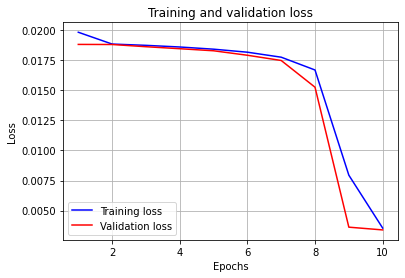

313/313 [==============================] - 1s 2ms/step
Final score (RMSE)for lat_latdim=5: 0.059691786766052246


In [15]:
#lat_dim=100 with learing rate of 0.1
lat_dim = 100
model_1 = Sequential(name='function1')
model_1.add(Dense(100, activation='relu', input_shape=(n_features,)))
model_1.add(Dense(lat_dim, activation='softmax'))

#function2
model_2 = Sequential(name='function2')
model_2.add(Lambda(lambda x: tf.reduce_sum(x, axis=1, keepdims=True), input_shape=(lat_dim,)))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(1))


# Combined model
combined_input = Input(shape=model_1.input_shape[1:])

model_1out = model_1(combined_input)
model_2out = model_2(model_1out)

combined_output = Concatenate()([model_1out, model_2out])
combined_output = Dense(1)(combined_output)
combined_model = keras.Model(inputs=combined_input, outputs=combined_output)

combined_model.summary()

optimizer1 =SGD(learning_rate=0.1)
combined_model.compile(loss='MSE',optimizer=optimizer1,  metrics=['acc'])
history = combined_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=2, validation_split=0.1)

#Show the training and validation loss versus the number of epochs. 
# Getting necessary data for plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting training and validation loss
# "b" is for "solid blue line"
plt.plot(epochs, loss, 'b', label='Training loss')
# r is for "solid red line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.xscale(value='log')
#plt.yscale(value='log')
plt.grid()
plt.show()

#Show also the test MSE value. 
# Model evaluation
loss = combined_model.evaluate(X_test, y_test)
# RMSE error. 
pred = combined_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print(f"Final score (RMSE)for lat_latdim=5: {score}")



Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 function1 (Sequential)         (None, 100)          11200       ['input_8[0][0]']                
                                                                                                  
 function2 (Sequential)         (None, 1)            301         ['function1[0][0]']              
                                                                                                  
 concatenate_7 (Concatenate)    (None, 101)          0           ['function1[0][0]',              
                                                                  'function2[0][0]']        

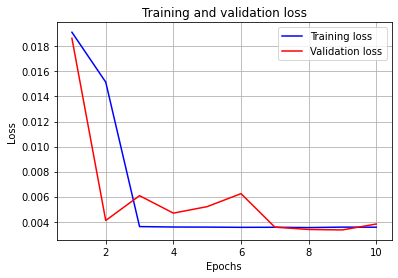

313/313 [==============================] - 1s 2ms/step
Final score (RMSE)for lat_latdim=5: 0.0633251816034317


In [16]:
#lat_dim=100 with learing rate of 0.5
lat_dim = 100
model_1 = Sequential(name='function1')
model_1.add(Dense(100, activation='relu', input_shape=(n_features,)))
model_1.add(Dense(lat_dim, activation='softmax'))

#function2
model_2 = Sequential(name='function2')
model_2.add(Lambda(lambda x: tf.reduce_sum(x, axis=1, keepdims=True), input_shape=(lat_dim,)))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(1))


# Combined model
combined_input = Input(shape=model_1.input_shape[1:])

model_1out = model_1(combined_input)
model_2out = model_2(model_1out)

combined_output = Concatenate()([model_1out, model_2out])
combined_output = Dense(1)(combined_output)
combined_model = keras.Model(inputs=combined_input, outputs=combined_output)

combined_model.summary()

optimizer1 =SGD(learning_rate=0.5)
combined_model.compile(loss='MSE',optimizer=optimizer1,  metrics=['acc'])
history = combined_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=2, validation_split=0.1)

#Show the training and validation loss versus the number of epochs. 
# Getting necessary data for plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting training and validation loss
# "b" is for "solid blue line"
plt.plot(epochs, loss, 'b', label='Training loss')
# r is for "solid red line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.xscale(value='log')
#plt.yscale(value='log')
plt.grid()
plt.show()

#Show also the test MSE value. 
# Model evaluation
loss = combined_model.evaluate(X_test, y_test)
# RMSE error. 
pred = combined_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print(f"Final score (RMSE)for lat_latdim=5: {score}")



Comment: 

- For the learning rate of 0.01 and 0.5, there are some fluction of the validation loss, but all in all it is convergent

- For the learning rate of 0.1 , it is convergent but both of them fall dramatically

### P1.4 Train the neural network with lat_dim = 100 for 50 epochs with ReLU and sigmoid functions

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 function1 (Sequential)         (None, 100)          11200       ['input_9[0][0]']                
                                                                                                  
 function2 (Sequential)         (None, 1)            301         ['function1[0][0]']              
                                                                                                  
 concatenate_8 (Concatenate)    (None, 101)          0           ['function1[0][0]',              
                                                                  'function2[0][0]']        

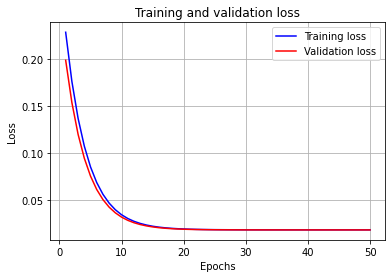

313/313 [==============================] - 1s 4ms/step
Final score (RMSE)for lat_latdim=5: 0.13809992372989655


In [17]:
#lat_dim=100 with 50 epoches with ReLu activation
lat_dim = 100

model_1 = Sequential(name='function1')
model_1.add(Dense(100, activation='relu', input_shape=(n_features,)))
model_1.add(Dense(lat_dim, activation='softmax'))

#function2
model_2 = Sequential(name='function2')
model_2.add(Lambda(lambda x: tf.reduce_sum(x, axis=1, keepdims=True), input_shape=(lat_dim,)))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(1))


# Combined model
combined_input = Input(shape=model_1.input_shape[1:])

model_1out = model_1(combined_input)
model_2out = model_2(model_1out)

combined_output = Concatenate()([model_1out, model_2out])
combined_output = Dense(1)(combined_output)
combined_model = keras.Model(inputs=combined_input, outputs=combined_output)

combined_model.summary()


optimizer1 =SGD(learning_rate=1e-4)
combined_model.compile(loss='MSE',optimizer=optimizer1,  metrics=['acc'])
history = combined_model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=2, validation_split=0.1)

#Show the training and validation loss versus the number of epochs. 
# Getting necessary data for plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting training and validation loss
# "b" is for "solid blue line"
plt.plot(epochs, loss, 'b', label='Training loss')
# r is for "solid red line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.xscale(value='log')
#plt.yscale(value='log')
plt.grid()
plt.show()

#Show also the test MSE value. 
# Model evaluation
loss = combined_model.evaluate(X_test, y_test)
# RMSE error. 
pred = combined_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print(f"Final score (RMSE)for lat_latdim=5: {score}")


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 function1 (Sequential)         (None, 100)          11200       ['input_10[0][0]']               
                                                                                                  
 function2 (Sequential)         (None, 1)            301         ['function1[0][0]']              
                                                                                                  
 concatenate_9 (Concatenate)    (None, 101)          0           ['function1[0][0]',              
                                                                  'function2[0][0]']        

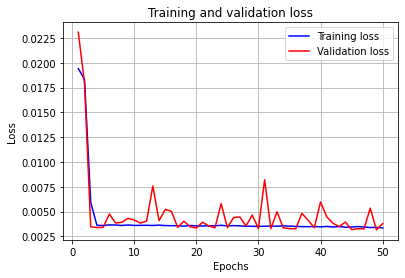

313/313 [==============================] - 1s 2ms/step
Final score (RMSE)for lat_latdim=5: 0.06229390949010849


In [18]:
#lat_dim=100 for 50 epochs with sigmoid activation function
lat_dim = 100
model_1 = Sequential(name='function1')
model_1.add(Dense(100, activation='relu', input_shape=(n_features,)))
model_1.add(Dense(lat_dim, activation='softmax'))

#function2
model_2 = Sequential(name='function2')
model_2.add(Lambda(lambda x: tf.reduce_sum(x, axis=1, keepdims=True), input_shape=(lat_dim,)))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(1))


# Combined model
combined_input = Input(shape=model_1.input_shape[1:])

model_1out = model_1(combined_input)
model_2out = model_2(model_1out)

combined_output = Concatenate()([model_1out, model_2out])
combined_output = Dense(1)(combined_output)
combined_model = keras.Model(inputs=combined_input, outputs=combined_output)

combined_model.summary()

optimizer1 =SGD(learning_rate=0.5)
combined_model.compile(loss='MSE',optimizer=optimizer1,  metrics=['acc'])
history = combined_model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=2, validation_split=0.1)

#Show the training and validation loss versus the number of epochs. 
# Getting necessary data for plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting training and validation loss
# "b" is for "solid blue line"
plt.plot(epochs, loss, 'b', label='Training loss')
# r is for "solid red line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.xscale(value='log')
#plt.yscale(value='log')
plt.grid()
plt.show()

#Show also the test MSE value. 
# Model evaluation
loss = combined_model.evaluate(X_test, y_test)
# RMSE error. 
pred = combined_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print(f"Final score (RMSE)for lat_latdim=5: {score}")


Comment for the result:

model with relu converges smoothly, while model with sigmoid converges with some fluctuation.
In terms of the value of the loss, model with sigmoid has lower loss than the model with relu.

### P1.5 Evaluate the model

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Now is the model with lat_dim '1' 
this is the 1 run for lat_dim: '1' 
Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 function1 (Sequential)         (None, 1)            1201        ['input_11[0][0]']               
                                                                                                  
 function2 (Sequential)         (None, 1)            301         ['function1[0][0]']              
                                                                                                  
 concatenate_10 (Concatenate)   (None, 2)         

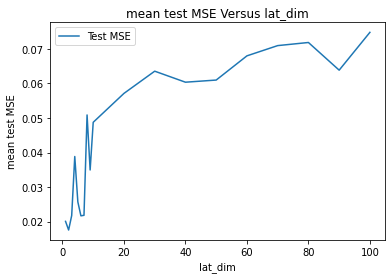

In [19]:
#P1.5 evaluate the model
from numpy.lib.function_base import average
# define the model for the evaluation
def used_model(lat_dim):
  model_1 = Sequential(name='function1')
  model_1.add(Dense(100, activation='relu', input_shape=(n_features,)))
  model_1.add(Dense(lat_dim, activation='softmax'))
  model_2 = Sequential(name='function2')
  model_2.add(Lambda(lambda x: tf.reduce_sum(x, axis=1, keepdims=True), input_shape=(lat_dim,)))
  model_2.add(Dense(100, activation='relu'))
  model_2.add(Dense(1))
  combined_input = Input(shape=model_1.input_shape[1:])
  model_1out = model_1(combined_input)
  model_2out = model_2(model_1out)
  combined_output = Concatenate()([model_1out, model_2out])
  combined_output = Dense(1)(combined_output)
  combined_model = keras.Model(inputs=combined_input, outputs=combined_output)
  combined_model.summary()

  optimizer1 =SGD(learning_rate=1e-4)
  combined_model.compile(loss='MSE',optimizer=optimizer1,  metrics=['acc'])
  return combined_model

#define the list of lat_dim in [1, 2, ..., 10, 20, 30, ..., 100]
lat_dim1=[i for i in range(1, 10, 1)]
lat_dim2=[i for i in range(10, 101, 10)]
lat_dim3=lat_dim1 + lat_dim2
print(lat_dim3)

#set the list of the mean test MSE 
mean_test_MSE=[]

# loop each lat_dim 
for lat_dim in lat_dim3:
  #Visualize which lat_dim is now
  print(f"Now is the model with lat_dim '{lat_dim}' ")
  #the best model (minMSE) of each run among five epochs
  epoch_best_loss=[]
  #loop five runs per lat_dim
  for n in range(5):
    #Visualize which run is now for the specific lat_dim
    print(f"this is the {n+1} run for lat_dim: '{lat_dim}' ")
    # activate the model for each lat_dim for each run
    test_model=used_model(lat_dim)
    # loop five epochs
    for m in range(5):
      #list for MSE for each epoch in each run
      epoch_loss=[]
      #run the model
      history = test_model.fit(X_train, y_train, batch_size=128, epochs=1, verbose=2, validation_split=0.1)
      #get the MSE for each epoch in each run
      mse_per_epoch = history.history['val_loss']
      #print it to visualize the number of MSE
      print(f'loss of latdim {lat_dim} for the {n+1} run in {m+1} epoch is {mse_per_epoch} ')
      #append it in the list for the MSE
      epoch_loss.append(mse_per_epoch)
    #get the index of minimum MSE in each loop of run
    best_epoch_loss_index=epoch_loss.index(min(epoch_loss))
    #get the value of minimum MSE in each epoch loop of run among 5 epochs
    best_epoch_loss=min(epoch_loss)
    #Append the minimum MSE in each loop of run among 5 epochs
    epoch_best_loss.append(best_epoch_loss)
    #average the list to get the mean Test MSE for each lat_dim
    avg_epoch_best_loss = average(epoch_best_loss)
  #Visualize the mean test MSE of each latdim
  print(f'mean Test MSE for latdim  {lat_dim} among 5 runs for 5 epochs is {avg_epoch_best_loss}')
  #Append the mean Test MSE to the list
  mean_test_MSE.append(avg_epoch_best_loss)
  #Visualize the list
  print(mean_test_MSE)

#import the library for the plot
import matplotlib.pyplot as plt

# plot the mean Test MSE versus the lat_dim
plt.plot(lat_dim3, mean_test_MSE, label='Test MSE')
plt.xlabel('lat_dim')
plt.ylabel('mean test MSE')
plt.title('mean test MSE Versus lat_dim')
plt.legend()
plt.show()






# P2-permutation-equivariant functions

### P2.1 Implement the neural network

In [20]:

# ML modules
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Lambda, Activation, Conv1D
# early stopping, callback, all the steps you are running you can ask the model to stop...
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# general stuff
import pandas as pd
import io
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data reading
df1 = pd.read_csv('/content/xtrain-2.csv', na_values=['NA','?'])
df2 = pd.read_csv('/content/xtest-2.csv', na_values=['NA','?'])
df3 = pd.read_csv('/content/ytrain-2.csv', na_values=['NA','?'])
df4 = pd.read_csv('/content/ytest-2.csv', na_values=['NA','?'])

# data pre-processing

X_train = df1.astype('float32')
y_train = df3.astype('float32')

X_test = df2.astype('float32')
y_test = df4.astype('float32')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

df1.values
df2.values
df3.values
df4.values

n_features = X_train.shape[1]
n_features


(97750, 16) (200000, 6) (97747, 16) (200000, 6)


16

In [19]:
#Define the model
#the name of the model


def eq_model(num):
  model=Sequential([
      Conv1D(filters=10, kernel_size=3, strides=1, padding='same', input_shape=(X_train.shape[1], 1)),
      keras.layers.ReLU(),
      Conv1D(filters=10, kernel_size=3, strides=1, padding='same'),
      keras.layers.ReLU(),
      keras.layers.Flatten(),
      Dense(units=100),
      keras.layers.ReLU(),
      Dense(units=y_train.shape[1])
])
  
#set the optimizer with the learning rate of 1e-4 and epsilon of 1e-3
  optimizer1 =Adam(learning_rate=1e-4,epsilon=1e-3)
#compile the first model with loss MSE and metrics ACC
  model.compile(loss='MSE',optimizer='Adam',  metrics=['acc'])

  return model
#train the model of validation split 0.1 and batch size of 128
for num in [(2,10), (2,100), (2,200),(3,5),(3,10),(3,100),(3,200)]:
  model_4=eq_model(num)
  history = model_4.fit(X_train, y_train, batch_size=300, epochs=100, verbose=2, validation_split=0.1)
  train_loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  



#

Epoch 1/100
294/294 - 3s - loss: 29438602.0000 - acc: 0.9898 - val_loss: nan - val_acc: 1.0000 - 3s/epoch - 9ms/step
Epoch 2/100
294/294 - 2s - loss: 5.4017 - acc: 1.0000 - val_loss: nan - val_acc: 1.0000 - 2s/epoch - 7ms/step
Epoch 3/100
294/294 - 2s - loss: 3.2007 - acc: 1.0000 - val_loss: nan - val_acc: 1.0000 - 2s/epoch - 8ms/step
Epoch 4/100
294/294 - 3s - loss: 3.1376 - acc: 1.0000 - val_loss: nan - val_acc: 1.0000 - 3s/epoch - 9ms/step
Epoch 5/100
294/294 - 3s - loss: 22.0095 - acc: 1.0000 - val_loss: nan - val_acc: 1.0000 - 3s/epoch - 10ms/step
Epoch 6/100
294/294 - 3s - loss: 10.4507 - acc: 1.0000 - val_loss: nan - val_acc: 1.0000 - 3s/epoch - 10ms/step
Epoch 7/100
294/294 - 3s - loss: 30.6513 - acc: 1.0000 - val_loss: nan - val_acc: 1.0000 - 3s/epoch - 10ms/step
Epoch 8/100
294/294 - 3s - loss: 9.2601 - acc: 1.0000 - val_loss: nan - val_acc: 1.0000 - 3s/epoch - 9ms/step
Epoch 9/100
294/294 - 3s - loss: 43.3917 - acc: 1.0000 - val_loss: nan - val_acc: 1.0000 - 3s/epoch - 10ms/